# Runs with sponge layer

In [1]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid
from xarrayutils import aggregate
import copy
# Pseudo Inversion 
from scipy.linalg import pinv, eig

In [4]:
# older data
data_dir = '/swot/SUM05/dbalwada/channel_model_output/varying_res/05km/sponge_topo/'

model_vars = ['uVeltave','vVeltave','wVeltave', 'Ttave', 
             'UTtave', 'VTtave','WTtave']
ds_model1 = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:782: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM05/dbalwada/channel_model_output/varying_res/05km/sponge_topo/. Using default version.
  "in %s. Using default version." % data_dir)
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [5]:
data_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run/'
# 
iters = range(13426560, 10473120+518400*4, 1440)
model_vars = ['uVeltave','vVeltave','wVeltave', 'Ttave', 
             'UTtave', 'VTtave','WTtave']
ds_model2 = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:782: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM04/dbalwada/channel_model/05km_sponge/run/. Using default version.
  "in %s. Using default version." % data_dir)


In [6]:
ds_model = xr.merge([ds_model1,ds_model2])

In [8]:
Mtemp = ds_model['Ttave'].mean(['XC','YC','Z']).load()

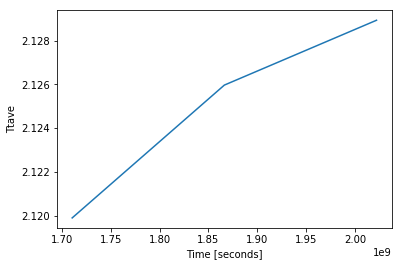

In [9]:
Mtemp.plot()

In [11]:
MWT = ds_model['WTtave'].mean(['time']).load()

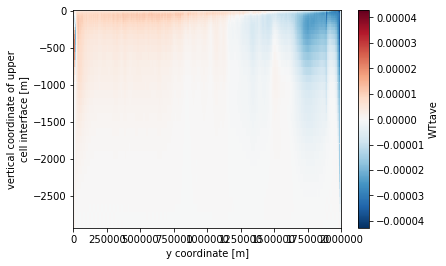

In [16]:
MWT.sel(XC=slice(0,800e3)).mean('XC').plot()

In [18]:
grid= Grid(ds_model, periodic=['X','Y'])

In [20]:
WpTp = grid.interp(ds_model['WTtave'].mean('time'), 'Z', boundary='extend') - \
    grid.interp(ds_model.wVeltave.mean('time'), 'Z',boundary='extend')*(ds_model.Ttave.mean('time'))

In [22]:
WpTp.load()

<xarray.DataArray (Z: 40, YC: 400, XC: 400)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 2.414693e-07,  2.500210e-07, ...,  2.288748e-07,  2.538233e-07],
        ...,
        [ 1.472472e-08,  1.768967e-08, ...,  1.495027e-08,  1.364424e-08],
        [ 4.123217e-08,  4.052504e-08, ...,  3.926266e-08,  4.065419e-08]],

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 7.255808e-07,  7.502686e-07, ...,  6.889227e-07,  7.622812e-07],
        ...,
        [-1.124499e-08, -2.732122e-09, ..., -1.123408e-08, -1.462467e-08],
        [ 8.847701e-08,  8.713869e-08, ...,  8.367488e-08,  8.707411e-08]],

       ...,

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [-3.242773e-07, -3.265919e-07, ..., -2.975871e-07, -3.189100e-07],
        ...,
        [ 6.069766e-07,  5.861766e-07, ...,  6.837267e-07,  6.453427e-07],
        [-2.565504e-06, -2.550251e-06, ..., -2.625049e-06, -2.596959e-06]]

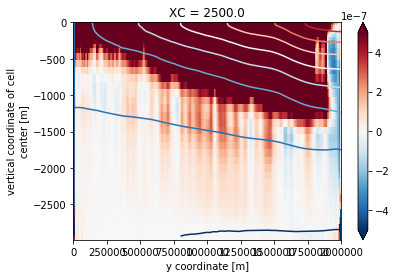

In [33]:
WpTp.sel(XC=0, method='nearest').plot(vmin=-5e-7)
ds_model.Ttave.mean('time').sel(XC=0, method='nearest').plot.contour(levels=np.linspace(0,8,9))

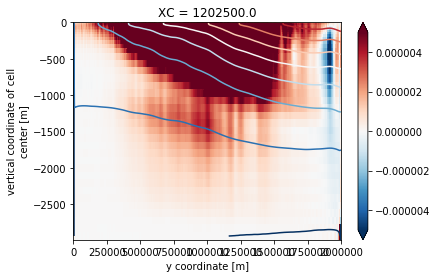

In [34]:
WpTp.sel(XC=1200e3, method='nearest').plot(vmin=-5e-6)
ds_model.Ttave.mean('time').sel(XC=1200e3, method='nearest').plot.contour(levels=np.linspace(0,8,9))

In [35]:
N2 = - grid.interp(grid.diff(ds_model.Ttave, 'Z', boundary='extend'), 'Z', boundary='extend') \
        / ds_model.drF

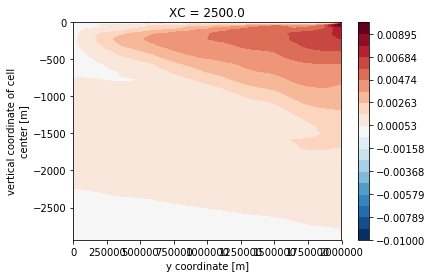

In [38]:
N2.sel(XC=0, method='nearest').mean('time').plot.contourf(vmin=-1e-2, levels=20)

In [ ]:
# PV fluxes 